In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model_city(df, city = 1):
    '''
    Breaks the dataset into 3 cities
    SF = 1
    OAK = 2
    SJ = 3

    INPUT: DataFrame
           Number for city to be modeled
    OUTPUT: returns a portion of the original dataframe
    ''' 
    if city == 1:
        return df[(df.end_station_latitude > 37.697799) & (df.end_station_longitude <-122.330676)]
    elif city == 2:
        return df[(df.end_station_latitude > 37.697799) & (df.end_station_longitude >-122.330676)]
    elif city == 3:
        return df[df.end_station_latitude < 37.697799]
    
def unique_stations(df):
    '''
    Given a dataframe, identify the unique start/end stations
    
    INPUT: DataFrame
    OUTPUT: 1 array of unique start station ids
  
    '''
    #names of each start station and the number of trips 
    lst_start_station_name = df.start_station_name.value_counts()
    #ids of each start station and the number of trips 
    lst_start_station_id = df.start_station_id.value_counts()
    num_unique_stations = lst_start_station_id.unique().size
    unique_start_sations = df.start_station_id.unique()
    unique_end_stations = df.end_station_id.unique()
    return unique_start_sations







    

In [3]:
df = pd.read_csv('data/201803-fordgobike-tripdata.csv')
mar_18_sf = model_city(df)
mar_18= unique_stations(mar_18_sf)
np.sort(mar_18)

array([  3,   4,   5,   6,   8,   9,  10,  11,  13,  14,  15,  16,  17,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        33,  34,  36,  37,  39,  41,  42,  43,  44,  45,  47,  49,  52,
        53,  55,  56,  58,  59,  60,  61,  62,  63,  64,  66,  67,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  84,  85,
        86,  88,  89,  90,  93,  95,  96,  97,  98,  99, 100, 101, 102,
       105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134,
       137, 138, 139, 140, 141, 144, 145, 146, 147, 148, 155, 163, 223,
       284, 285, 321, 323, 324, 336, 342, 343])

In [4]:
df = pd.read_csv('data/201804-fordgobike-tripdata.csv')
apr_18_sf = model_city(df)
apr_18= unique_stations(apr_18_sf)
np.sort(apr_18)

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  33,  34,  36,  37,  39,  41,  42,  43,  44,  45,  47,  49,
        50,  52,  53,  55,  56,  58,  59,  60,  61,  62,  63,  64,  66,
        67,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        84,  85,  86,  88,  89,  90,  93,  95,  96,  97,  98,  99, 100,
       101, 102, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132,
       133, 134, 137, 138, 139, 140, 141, 144, 145, 146, 147, 223, 230,
       231, 239, 284, 285, 321, 323, 324, 336, 342, 343, 344, 345])

In [5]:


def new_stn_coords(old_stn, new_stn):
    '''
    INPUT: 2 lists. 1 list of new station ids
                    1 list of old station ids
    '''
    new_stn = set(new_stn) - set(old_stn)
    lst_new = list(new_stn)
    return lst_new



In [6]:
proposed_stn = new_stn_coords(mar_18, apr_18)
proposed_stn

[230, 231, 7, 239, 50, 344, 345]

In [7]:
def stn_coords(df):
    #getting the coordinates from the dataset
    coordinates = np.array(df[['start_station_longitude', 'start_station_latitude']])
    unique_coords = np.unique(coordinates, axis = 0)
    #create a dictionary with
    #station id as key
    #coordinates for the station id as values
    id_coord = {}
    for u in unique_coords:
        k = df.start_station_id[(df.start_station_longitude == u[0]) &(df.start_station_latitude == u[1])].iloc[0]
        id_coord[k] = u
    return id_coord




In [8]:
def plot_new_station(df, new_stn):
#     print("The origin station is {}.".format(t))
#     print("The 3 closest neighbors are: {}, {}, {}".format(int(knn_dict.get(t)[0]),int(knn_dict.get(t)[1]),int(knn_dict.get(t)[2])))
    id_coord = stn_coords(df)
    plt.figure(figsize = (10,10))
    ll,rr = -122.50, -122.36
    bb = 37.73
    plt.xlim(ll,rr)
    plt.ylim(bb, bb+(rr-ll))
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Map of Ford GoBike stations at the end of April 2018")
    plt.scatter(df.start_station_longitude, df.start_station_latitude, s=1, c=('r'))
    for n in new_stn:
#         if id_coord.get(n) is not None:
        plt.scatter(id_coord.get(n)[0], id_coord.get(n)[1], s=20, marker='x', c=('b'))
#         else:
#             print ("Station {} has been removed.".format(n))

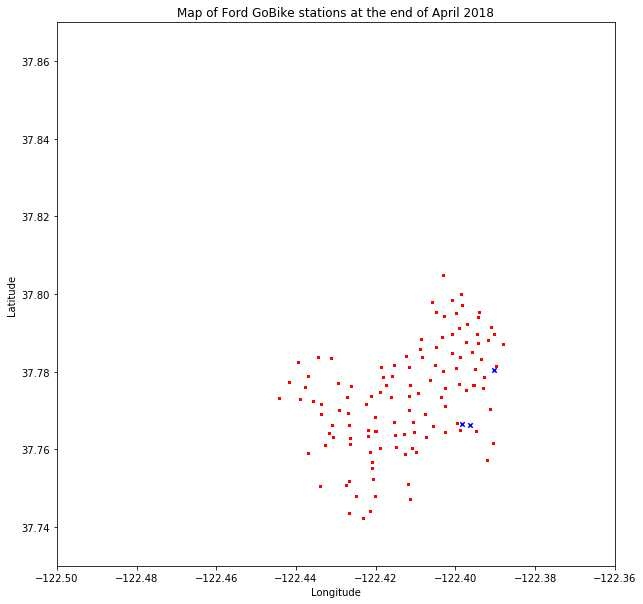

In [9]:
plot_new_station(apr_18_sf, proposed_stn)

In [14]:
def euclidean_distance(x, y):
    return np.sqrt(((x-y)**2).sum(axis=1))

In [22]:
def knn_proposed_stn(df, proposed_stn, num_neighbors = 3):
    id_coord = stn_coords(df)
    coordinates = np.array(df[['start_station_longitude', 'start_station_latitude']])
    unique_coords = np.unique(coordinates, axis = 0)
    knn_dict = {}
    for p in proposed_stn:
        neighbors = unique_coords[np.argsort(euclidean_distance(id_coord.get(p), unique_coords))][1:num_neighbors+1]
        k = df.start_station_id[(df.start_station_longitude == id_coord.get(p)[0]) &(df.start_station_latitude == id_coord.get(p)[1])].iloc[0]
        v = []
        for i in range(num_neighbors):
            knn_id = df.start_station_id[(df.start_station_longitude == neighbors[i][0]) &(df.start_station_latitude == neighbors[i][1])].iloc[0]
            v.append(knn_id)
        knn_dict[k] = v
    return knn_dict

In [23]:
knn_proposed_stn(apr_18_sf, proposed_stn)

{230: [231, 7, 239],
 231: [230, 7, 239],
 7: [231, 230, 239],
 239: [231, 7, 230],
 50: [342, 66, 343],
 344: [345, 116, 115],
 345: [102, 115, 344]}